## EDA

In [17]:
import pandas as pd 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [14]:
path = Path.cwd().parent / "dataset" / "processed" /"preprocessed_data.csv"
df =pd.read_csv(path)
pd.set_option("display.max_columns",None)
df.head(2)

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,DaysToShip,OrderYear,OrderMonth,OrderQuarter,OrderYearMonth,OrderWeekOfYear,OrderMonthName,OrderIsWeekendOrder,ShipYear,ShipMonth,ShipQuarter,ShipYearMonth,ShipWeekOfYear,ShipMonthName,ShipIsWeekendShip
0,ca-2017-152156,2017-11-08,2017-11-11,second class,cg-12520,claire gute,consumer,united states,henderson,kentucky,42420,south,FUR-BO-10001798,furniture,bookcases,bush somerset collection bookcase,261.96,3,2017,11,4,2017-11,45,November,False,2017,11,4,2017-11,45,November,True
1,ca-2017-152156,2017-11-08,2017-11-11,second class,cg-12520,claire gute,consumer,united states,henderson,kentucky,42420,south,FUR-CH-10000454,furniture,chairs,"hon deluxe fabric upholstered stacking chairs,...",731.94,3,2017,11,4,2017-11,45,November,False,2017,11,4,2017-11,45,November,True


In [15]:
# Basic row count
print("Total rows:", len(df))

# Distinct entities
print("Distinct customers:", df['CustomerID'].nunique())
print("Distinct products:", df['ProductID'].nunique())
print("Distinct regions:", df['Region'].nunique())

# Date ranges
print("Min OrderDate:", df['OrderDate'].min())
print("Max OrderDate:", df['OrderDate'].max())


Total rows: 9788
Distinct customers: 793
Distinct products: 1860
Distinct regions: 4
Min OrderDate: 2015-01-03
Max OrderDate: 2018-12-30


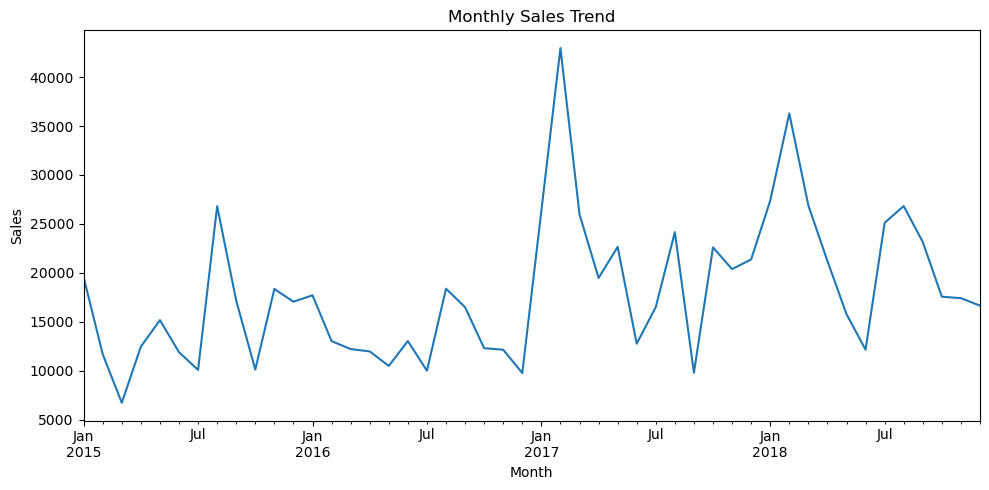

In [24]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], dayfirst=True, errors='coerce')
monthly_sales = df.groupby(pd.Grouper(key="OrderDate", freq="ME"))['Sales'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.tight_layout()
plt.savefig("/Users/haseebsagheer/Documents/Python Learning/Cloud-Retail-Insights/docs/eda/monthly_sales.png")
plt.show()

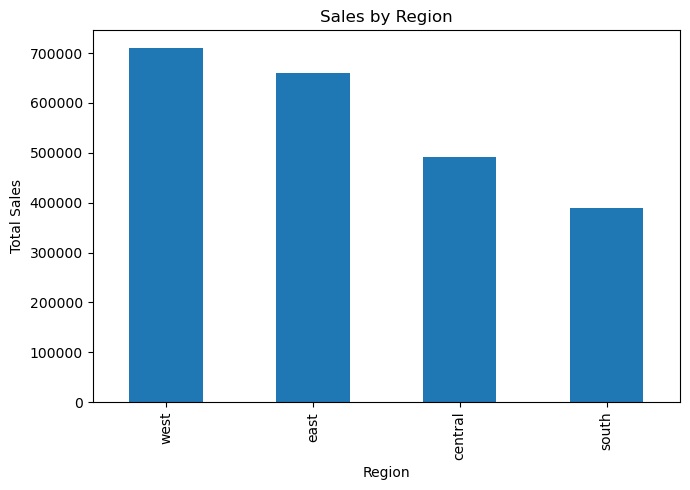

In [25]:
region_sales = df.groupby("Region")['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
region_sales.plot(kind="bar")
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("/Users/haseebsagheer/Documents/Python Learning/Cloud-Retail-Insights/docs/eda/sales_by_region.png")
plt.show()


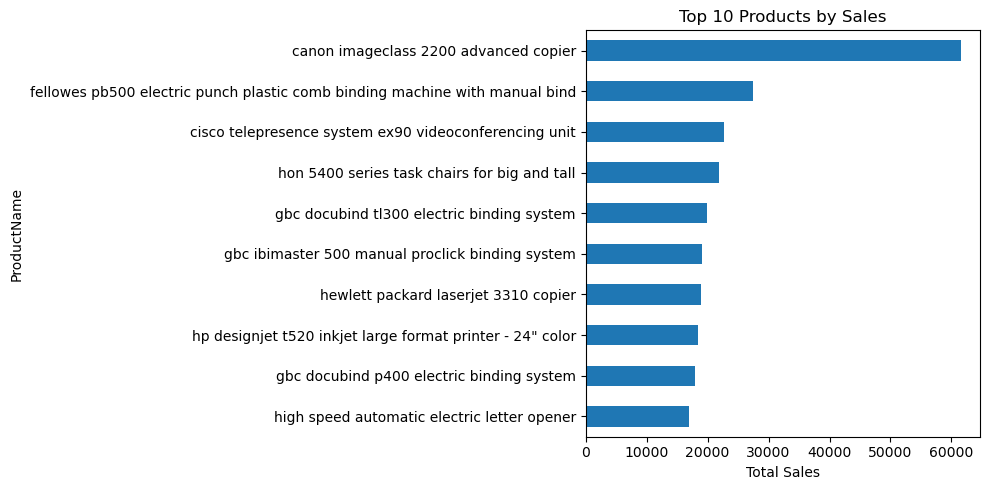

In [26]:
top_products = df.groupby("ProductName")['Sales'].sum().nlargest(10)

plt.figure(figsize=(10,5))
top_products.plot(kind="barh")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("/Users/haseebsagheer/Documents/Python Learning/Cloud-Retail-Insights/docs/eda/top10_products.png")
plt.show()

### How to rerun EDA
1. Open `notebooks/03_eda.ipynb` in VS Code.
2. Load `fact_sales` either from Azure SQL (using env vars in `.env`) or from the local Parquet file (`data/processed/fact_sales.parquet`).
3. Run the sanity check cells:
   - Row count
   - Distinct customers/products/regions
   - Order date ranges
4. Run the plotting cells to generate:
   - Monthly Sales trend (`docs/eda/monthly_sales.png`)
   - Sales by Region (`docs/eda/sales_by_region.png`)
   - Top 10 Products by Sales (`docs/eda/top10_products.png`)
5. Re-run whenever the pipeline is updated to validate trends.
